# 最急降下法によるパラメータの同定

In [ ]:
# 視点を動かすためのオプション
!pip3 install ipympl
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

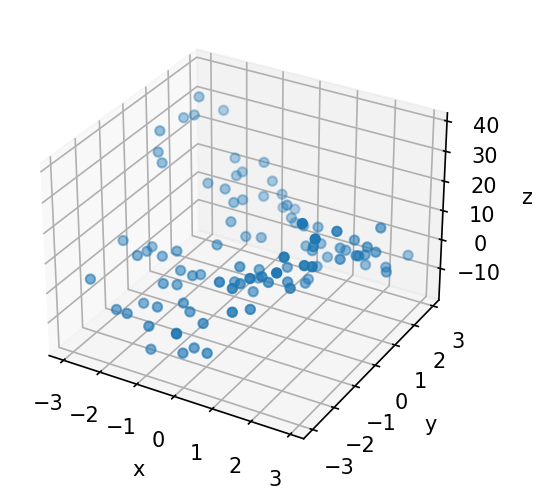

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

def fittingFunction(x, y, beta1, beta2):
    return beta1*x**2.0 + beta2*x*y

url = "https://raw.githubusercontent.com/daiki-matsunaga/r3_ml_lecture2022/main/chapter2/data/3d_data.txt"
data = np.loadtxt(url).T

x, y, z = data[0], data[1], data[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## 初期勾配$\beta = 0$から反復法により探索する
チェックポイント1：初期勾配 $\beta=0$でうまく行った場合，$\beta=2$でも試してみること  
チェックポイント2：学習率$\alpha$をあげるとどうなるか確認せよ

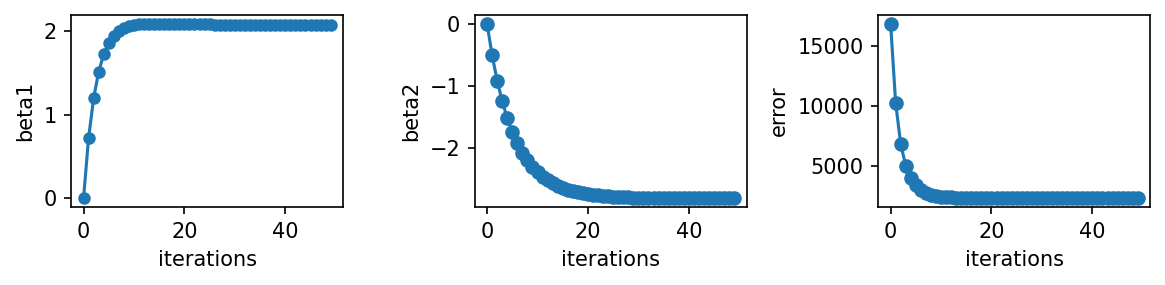

beta1 =  2.071845765099539
beta2 =  -2.808731459422103


In [27]:
beta1 = 0.0
beta2 = 0.0
alpha = 1.0e-4
numSteps = 50

# 空のリストを生成
l_beta1 = []
l_beta2 = []
l_error = []

for step in range(numSteps):
    # 現在の誤差・微分値の計算
    error = np.sum((z - beta1*x**2 - beta2*x*y)**2)
    re_rbeta1 = -2.0*np.sum((z - beta1*x**2 - beta2*x*y)*x**2)
    re_rbeta2 = -2.0*np.sum((z - beta1*x**2 - beta2*x*y)*x*y)

    l_beta1.append(beta1)
    l_beta2.append(beta2)
    l_error.append(error)
    
    beta1 -= alpha*re_rbeta1
    beta2 -= alpha*re_rbeta2

# show training data
fig, ax = plt.subplots(1,3, figsize=(8, 2))

ax[0].plot(l_beta1, "-o", markersize=5)
ax[0].set_xlabel("iterations")
ax[0].set_ylabel("beta1")

ax[1].plot(l_beta2, "-o")
ax[1].set_xlabel("iterations")
ax[1].set_ylabel("beta2")

ax[2].plot(l_error, "-o")
ax[2].set_xlabel("iterations")
ax[2].set_ylabel("error")

fig.tight_layout()
plt.show()

print("beta1 = ", beta1) 
print("beta2 = ", beta2) 

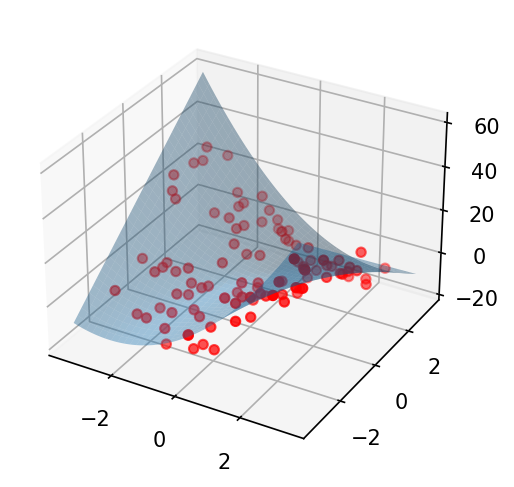

In [30]:
# 正しいbetaが得られたか再表示

#beta1 = -0.15318
#beta2 = -2.78836

grid = np.arange(-3.5, 3.5, 0.1)
xt, yt = np.meshgrid(grid, grid)

zt = fittingFunction(xt, yt, beta1, beta2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='red')
ax.plot_surface(xt, yt, zt, zorder=10, alpha=0.4)
plt.show()
